In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('max.columns', 100)

In [3]:
import missingno as msno

In [4]:
from datetime import datetime
from tqdm import tqdm

In [5]:
import xgboost as xgb
import lightgbm as lgb

In [6]:
from sklearn.metrics import f1_score, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold, KFold

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
base_info = pd.read_csv('base_info.csv')

In [11]:
base_info.shape

(24865, 33)

In [12]:
base_info

,id,oplocdistrict,industryphy,industryco,dom,opscope,enttype,enttypeitem,opfrom,opto,state,orgid,jobid,adbusign,townsign,regtype,empnum,compform,parnum,exenum,opform,ptbusscope,venind,enttypeminu,midpreindcode,protype,oploc,regcap,reccap,forreccap,forregcap,congro,enttypegb
0,47645761dc56bb8c5fae00114b768b5d9b6e917c3aec07c4,340223,M,7513.0,31487d8f256f16bd6244b7251be2ebb24d1db51663c654...,纳米新材料、机械设备、五金配件加工、销售及技术推广服务，道路货物运输。（依法须经批准的项目，...,1100,1150.0,2019-07-11 00:00:00,NaN,6,340223010010000000,340200000000115392,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1151.0,NaN,NaN,2367b4cac96d8598,50.0,NaN,NaN,NaN,NaN,1151
1,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,340222,O,8090.0,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,健身服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2017-09-06,NaN,6,340222060010000000,340200000000112114,0,1,1,3.0,1.0,NaN,NaN,10,NaN,3.0,NaN,NaN,NaN,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,10.0,NaN,NaN,NaN,NaN,9600
2,59b38c56de3836838082cfcb1a298951abfe15e6940c49ba,340202,R,9053.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,文化娱乐经纪人服务；境内文艺活动组织与策划；文化艺术交流活动组织策划；演出经纪；其他文化艺术...,1100,1150.0,2020-09-14 14:46:30,NaN,6,340202010010000000,400000000000753910,0,0,1,2.0,NaN,1.0,NaN,NaN,NaN,NaN,1151.0,NaN,NaN,2367b4cac96d8598,100.0,NaN,NaN,NaN,NaN,1151
3,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,340221,L,7212.0,746df9aaed8578571760c563abe882c8ba25209fc6d5db...,投资管理及咨询(证券、期货除外)；企业管理。（依法须经批准的项目，经相关部门批准后方可开展经...,4500,4540.0,2015-09-30,NaN,6,340221010010000000,400000000000013538,0,1,1,2.0,NaN,NaN,NaN,01-以个人财产出资,NaN,NaN,NaN,NaN,NaN,2367b4cac96d8598,10.0,NaN,NaN,NaN,NaN,4540
4,f000950527a6feb63ee1ce82bb22ddd1ab8b8fdffa3b91fb,340202,R,8810.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,境内文化艺术交流活动策划；企业形象策划；礼仪庆典服务；翻译服务；专利代理；广告设计、制作、代...,1100,1130.0,2017-12-01,2067-11-30,7,340200000000000000,400000000000283237,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2367b4cac96d8598,100.0,NaN,NaN,NaN,NaN,1130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,f1c1045b13d18329a2bd99d2a7e2227688c0d69bf1d1e325,340225,O,8131.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,家电销售、维修及安装服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2009-02-20 00:00:00,NaN,6,340200000000116780,341400000000011622,0,1,1,3.0,1.0,NaN,NaN,10,NaN,3.0,NaN,NaN,NaN,f67c1b92f52ac52e424308ab51241cdef9be3e39c8e1c6...,20.0,NaN,NaN,NaN,NaN,9600
24861,f000950527a6feb6bde38216d7cbbf32e66d3a3a96d4dbda,340207,J,6790.0,31487d8f256f16bdb06579d53b25cbb6c4a6c18662c495...,股权投资，投资管理，投资咨询。（依法须经批准的项目，经相关部门批准后方可开展经营活动）***,4500,4530.0,2015-12-18,2065-12-17,6,340200000000000000,340200000000115797,0,1,1,2.0,NaN,2.0,1.0,NaN,NaN,NaN,4533.0,NaN,NaN,2367b4cac96d8598,110.0,0.0,NaN,NaN,NaN,4533
24862,da8691b210adb3f65b43370d3a362f4aa1d3b16b5ba0c9d7,340207,O,8111.0,ca213febe80e171c3b9617e39b49d64e4a4abca4f2d760...,快速喷漆、电路机维修、汽车美容装潢、汽车维修服务。（依法须经批准的项目，经相关部门批准后方可...,9600,NaN,2012-05-31 00:00:00,NaN,6,340207030010000000,340200000000115275,0,1,1,2.0,1.0,NaN,NaN,10,NaN,3.0,NaN,NaN,NaN,2367b4cac96d8598,10.0,NaN,NaN,NaN,NaN,9600
24863,516ab81418ed215dcbbf0614a7b929e691f8eed153d7bb31,340225,O,8090.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,一般经营项目：园林设计、市政绿化、假山工艺、苗圃栽培。,1100,1130.0,2012-10-16 00:00:00,NaN,7,340200000000116750,341400000000015220,0,1,1,3.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2367b4cac96d8598,260.0,260.0,NaN,NaN,NaN,1130


In [13]:
base_info['id'].nunique()

24865

<AxesSubplot:>

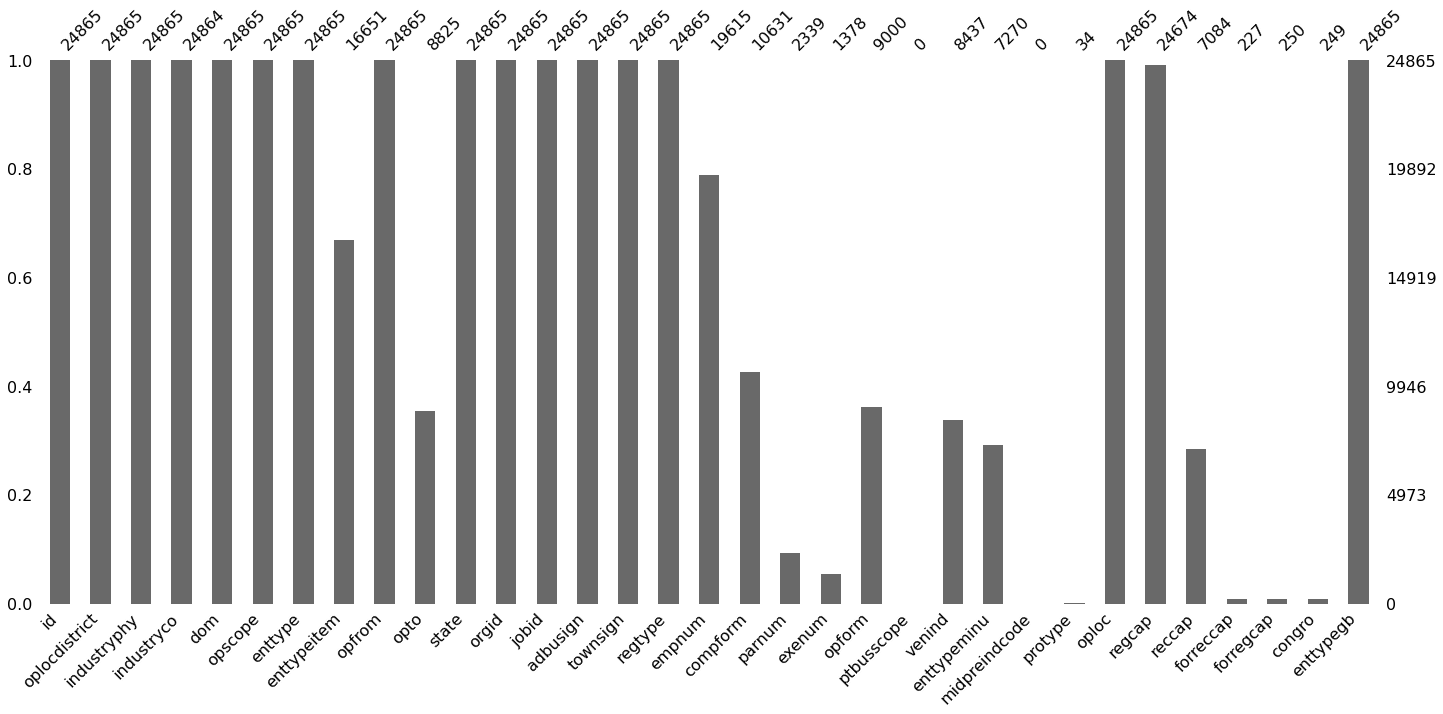

In [14]:
msno.bar(base_info)

In [15]:
col = base_info.columns

In [16]:
for c in col:
    print(c, base_info[c].nunique())

id 24865
oplocdistrict 16
industryphy 20
industryco 345
dom 23278
opscope 20815
enttype 17
enttypeitem 31
opfrom 6620
opto 5746
state 6
orgid 78
jobid 434
adbusign 2
townsign 2
regtype 3
empnum 62
compform 2
parnum 51
exenum 50
opform 33
ptbusscope 0
venind 3
enttypeminu 26
midpreindcode 0
protype 2
oploc 5351
regcap 1143
reccap 597
forreccap 11
forregcap 38
congro 33
enttypegb 53


In [17]:
corr = base_info.corr()

<AxesSubplot:>

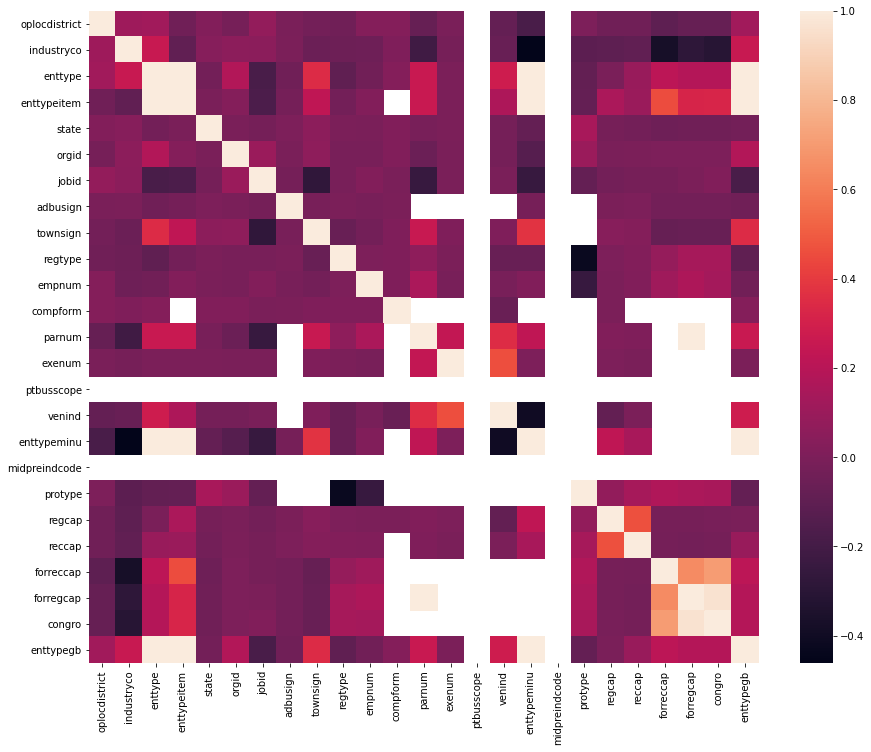

In [18]:
plt.figure(figsize = (15,12))
sns.heatmap(corr)

## ?????
哦, 原来是缺失值

In [19]:
annual_report_info = pd.read_csv('annual_report_info.csv')

In [20]:
annual_report_info

,id,ANCHEYEAR,STATE,FUNDAM,MEMNUM,FARNUM,ANNNEWMEMNUM,ANNREDMEMNUM,EMPNUM,EMPNUMSIGN,BUSSTNAME,COLGRANUM,RETSOLNUM,DISPERNUM,UNENUM,COLEMPLNUM,RETEMPLNUM,DISEMPLNUM,UNEEMPLNUM,WEBSITSIGN,FORINVESTSIGN,STOCKTRANSIGN,PUBSTATE
0,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,2017.0,2.0,5.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,3.0
1,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,2018.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,3.0
2,f000950527a6feb63ee1ce82bb22ddd1ab8b8fdffa3b91fb,2017.0,2.0,NaN,NaN,NaN,NaN,NaN,4.0,2.0,开业,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0
3,f000950527a6feb63ee1ce82bb22ddd1ab8b8fdffa3b91fb,2018.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,开业,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0
4,9c7fa510616a68309e4badf2a7a3123c0462fb85bf28ef17,2017.0,2.0,5.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22545,f000950527a6feb6bde38216d7cbbf32e66d3a3a96d4dbda,2015.0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,开业,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,NaN,2.0
22546,516ab81418ed215dcbbf0614a7b929e691f8eed153d7bb31,2015.0,2.0,NaN,NaN,NaN,NaN,NaN,8.0,2.0,开业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0
22547,516ab81418ed215dcbbf0614a7b929e691f8eed153d7bb31,2016.0,2.0,NaN,NaN,NaN,NaN,NaN,4.0,2.0,歇业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0
22548,516ab81418ed215dcbbf0614a7b929e691f8eed153d7bb31,2017.0,2.0,NaN,NaN,NaN,NaN,NaN,4.0,2.0,歇业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0


In [21]:
annual_report_info.shape

(22550, 23)

In [22]:
annual_report_info.nunique()

id               8937
ANCHEYEAR           4
STATE               2
FUNDAM            167
MEMNUM              5
FARNUM              6
ANNNEWMEMNUM        3
ANNREDMEMNUM        1
EMPNUM            270
EMPNUMSIGN          2
BUSSTNAME           4
COLGRANUM          43
RETSOLNUM          14
DISPERNUM           5
UNENUM             35
COLEMPLNUM         94
RETEMPLNUM         26
DISEMPLNUM         16
UNEEMPLNUM         72
WEBSITSIGN          2
FORINVESTSIGN       2
STOCKTRANSIGN       2
PUBSTATE            3
dtype: int64

<AxesSubplot:>

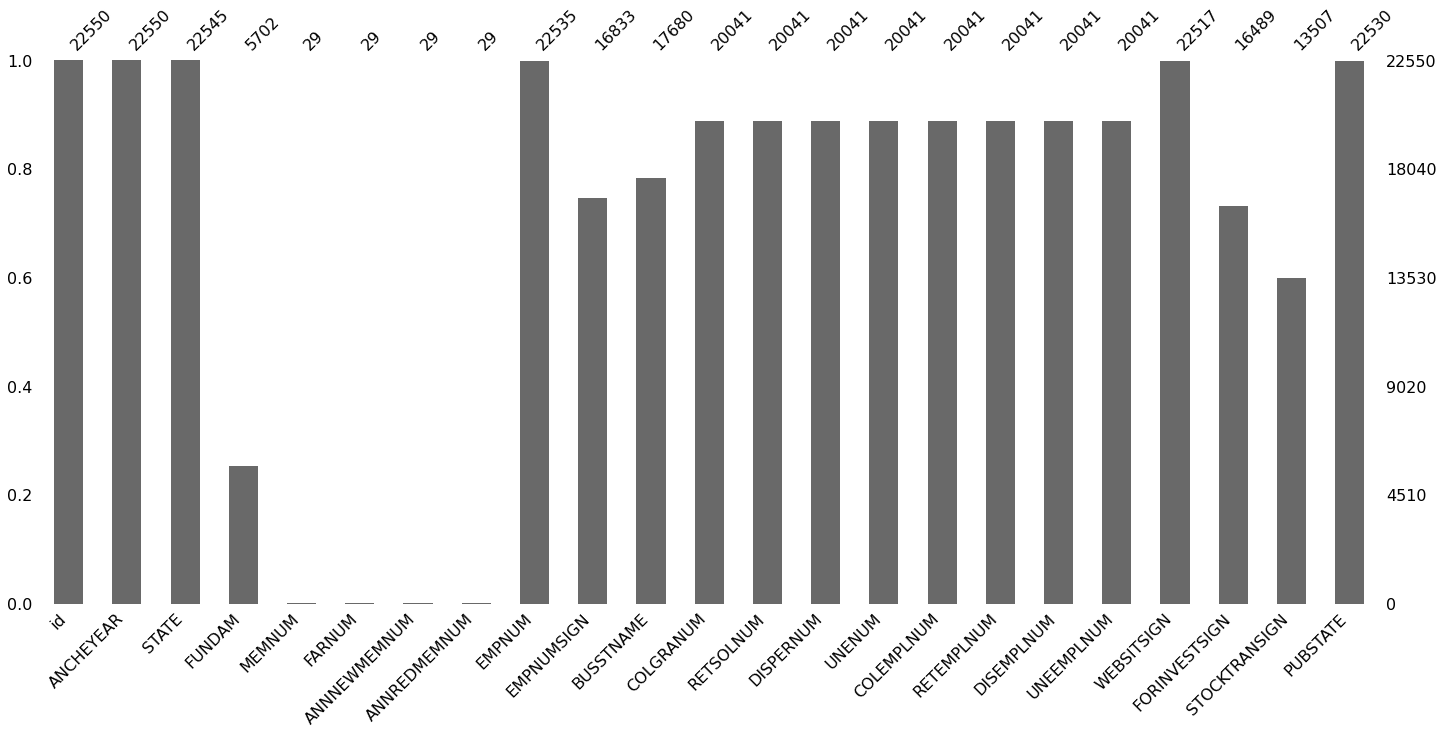

In [23]:
msno.bar(annual_report_info)

In [24]:
tax_info = pd.read_csv('tax_info.csv')

In [25]:
tax_info

,id,START_DATE,END_DATE,TAX_CATEGORIES,TAX_ITEMS,TAXATION_BASIS,TAX_RATE,DEDUCTION,TAX_AMOUNT
0,f000950527a6feb6c2f40c9d8477e73a439dfa0897830397,2015/09/01,2015/09/30,印花税,工伤保险（单位）,72530.75,0.0003,-0.04,21.80
1,f000950527a6feb6c2f40c9d8477e73a439dfa0897830397,2015/09/01,2015/09/30,印花税,失业保险（单位）,72530.75,0.0003,-0.04,21.80
2,f000950527a6feb6c2f40c9d8477e73a439dfa0897830397,2015/09/01,2015/09/30,印花税,医疗保险（单位）,72530.75,0.0003,-0.04,21.80
3,f000950527a6feb6c2f40c9d8477e73a439dfa0897830397,2015/09/01,2015/09/30,印花税,企业养老保险基金（单位）,72530.75,0.0003,-0.04,21.80
4,f000950527a6feb6c2f40c9d8477e73a439dfa0897830397,2015/09/01,2015/09/30,印花税,烟叶收购,72530.75,0.0003,-0.04,21.80
...,...,...,...,...,...,...,...,...,...
29190,f000950527a6feb6cb8976eb56233ede461cb23103f85f32,2015/12/08,2015/12/08,印花税,销售额或营业额,0.00,0.2000,NaN,60.00
29191,f000950527a6feb6cb8976eb56233ede461cb23103f85f32,2015/12/08,2015/12/08,印花税,增消营税额（1%）,0.00,0.2000,NaN,60.00
29192,d8071a739aa75a3bbb9e08ebd134ae1289f194b70cac0e95,2016/07/01,2016/07/31,房产税,从价计征,NaN,NaN,NaN,94.96
29193,d8071a739aa75a3bbb9e08ebd134ae1289f194b70cac0e95,2016/07/01,2016/07/31,个人所得税,工资薪金所得,NaN,NaN,NaN,837.48


In [26]:
print(tax_info.shape)
tax_info['id'].nunique()

(29195, 9)


808

<AxesSubplot:>

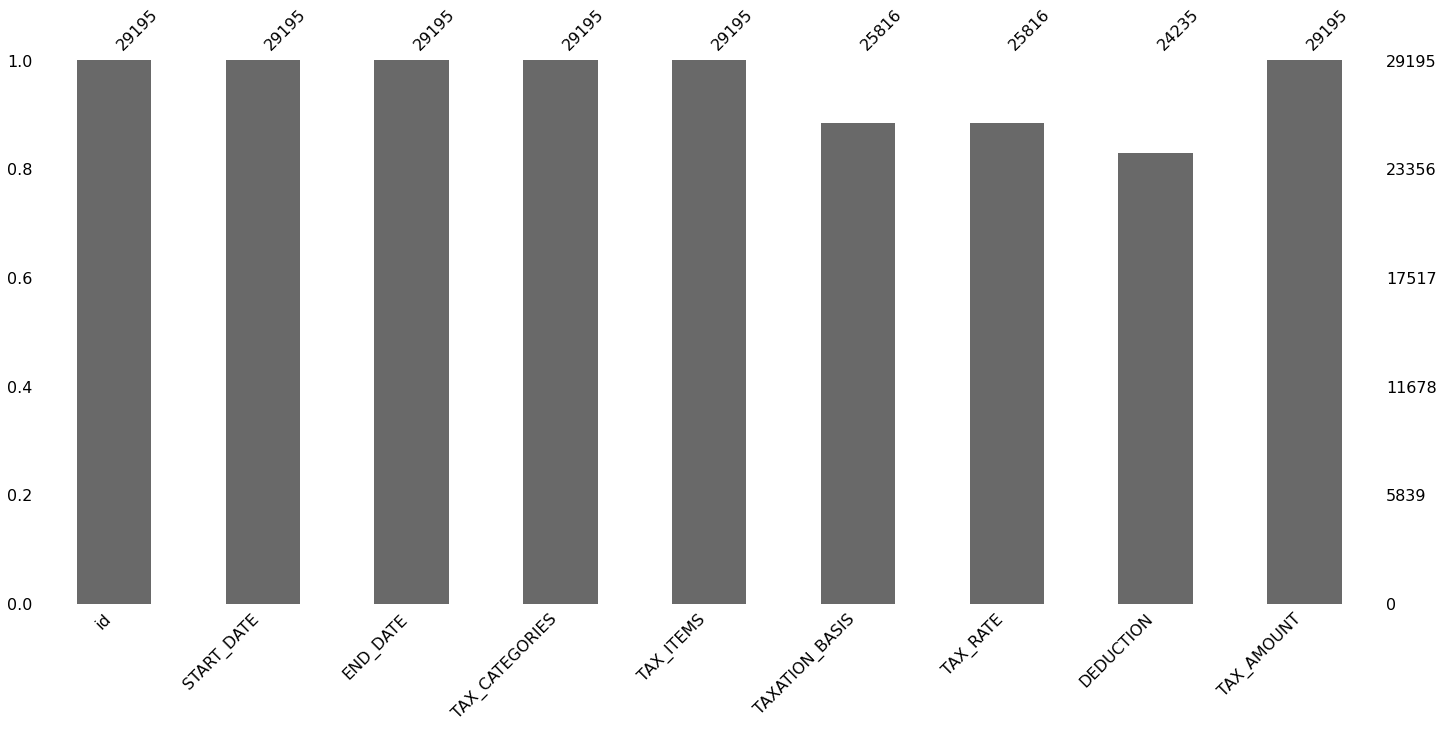

In [27]:
msno.bar(tax_info)

In [28]:
change_info = pd.read_csv('change_info.csv')
change_info

,id,bgxmdm,bgq,bgh,bgrq
0,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,939.0,9dec12da51cdb672a91b4a8ae0e0895f7bfeb243dfa3e0c8,9dec12da51cdb672a91b4a8ae0e0895f4a56cbe3deca98...,2.019060e+13
1,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,112.0,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,2.019060e+13
2,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,111.0,54ca436ffb87f24c820178b45fcc3a7b,f80e3376abcf81ad2a279d6d99046153,2.017013e+13
3,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,128.0,f1fdb1c866dc96638cbfb8b788b91393,1eca8a0d8beca58d988f7dccab5dc868,2.017013e+13
4,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,925.0,54ca436ffb87f24c820178b45fcc3a7b,f80e3376abcf81ad2a279d6d99046153,2.017013e+13
...,...,...,...,...,...
45935,da8691b210adb3f65b43370d3a362f4aa1d3b16b5ba0c9d7,113.0,89fe2eb3a8d8cbd5d10c8fad19102adc96d250d70714c2...,89fe2eb3a8d8cbd5d10c8fad19102adc31cd22c6637a9c...,2.018012e+13
45936,9c7fa510616a68303d3427d4bfd4b0cf3e4843f2bf3f637a,128.0,86cd59dbe8243a52,d0b849303de5e628ee7a54538f0f776b,2.018063e+13
45937,9c7fa510616a68303d3427d4bfd4b0cf3e4843f2bf3f637a,113.0,6be29fd3c7f6c82d30f07bfcb4d88b653076b95e512332...,6be29fd3c7f6c82d30f07bfcb4d88b653076b95e512332...,2.018063e+13
45938,9c7fa510616a68303d3427d4bfd4b0cf3e4843f2bf3f637a,131.0,13d999d56eb3e102,9cfe81eb6c3bb14c1e7ef4e004dc27fe,2.018063e+13


In [29]:
change_info.shape

(45940, 5)

In [30]:
change_info['id'].nunique()

8726

<AxesSubplot:>

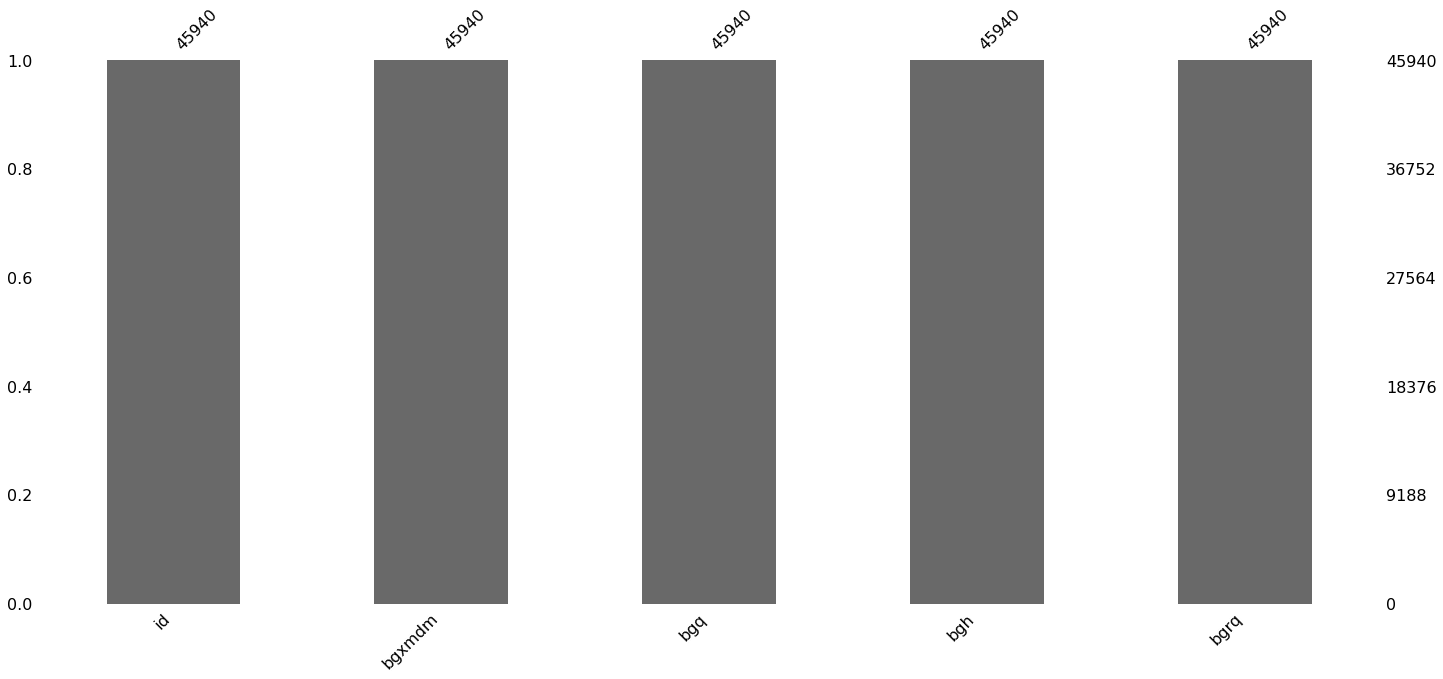

In [31]:
msno.bar(change_info)

In [32]:
news_info = pd.read_csv('news_info.csv')

In [33]:
news_info

,id,positive_negtive,public_date
0,f000950527a6feb62669d6a175fe6fdccd1eb4f7ca8e5016,积极,2016-12-30
1,f000950527a6feb6e8bd9919e2ca363359bcfa997a0f9de7,中立,2017-08-09
2,f000950527a6feb6e8bd9919e2ca363359bcfa997a0f9de7,消极,2016-02-29
3,d8071a739aa75a3bcf6fb0041ee883243251d30025ab9d45,中立,2018-06-08
4,f000950527a6feb6d71de3382afa0bc5ff87bb65477f698a,积极,2015-06-29
...,...,...,...
10513,d8071a739aa75a3b6860158ec0cc8ba7972fb14ba37b9e0a,中立,2013-12-25
10514,d8071a739aa75a3b6860158ec0cc8ba7972fb14ba37b9e0a,积极,2013-12-23
10515,f000950527a6feb6de489447885cd6d18f593ec2674174ac,中立,2020-04-07
10516,f000950527a6feb6de489447885cd6d18f593ec2674174ac,中立,2020-02-21


In [34]:
print(news_info.shape)
print(news_info['id'].nunique())

(10518, 3)
927


<AxesSubplot:>

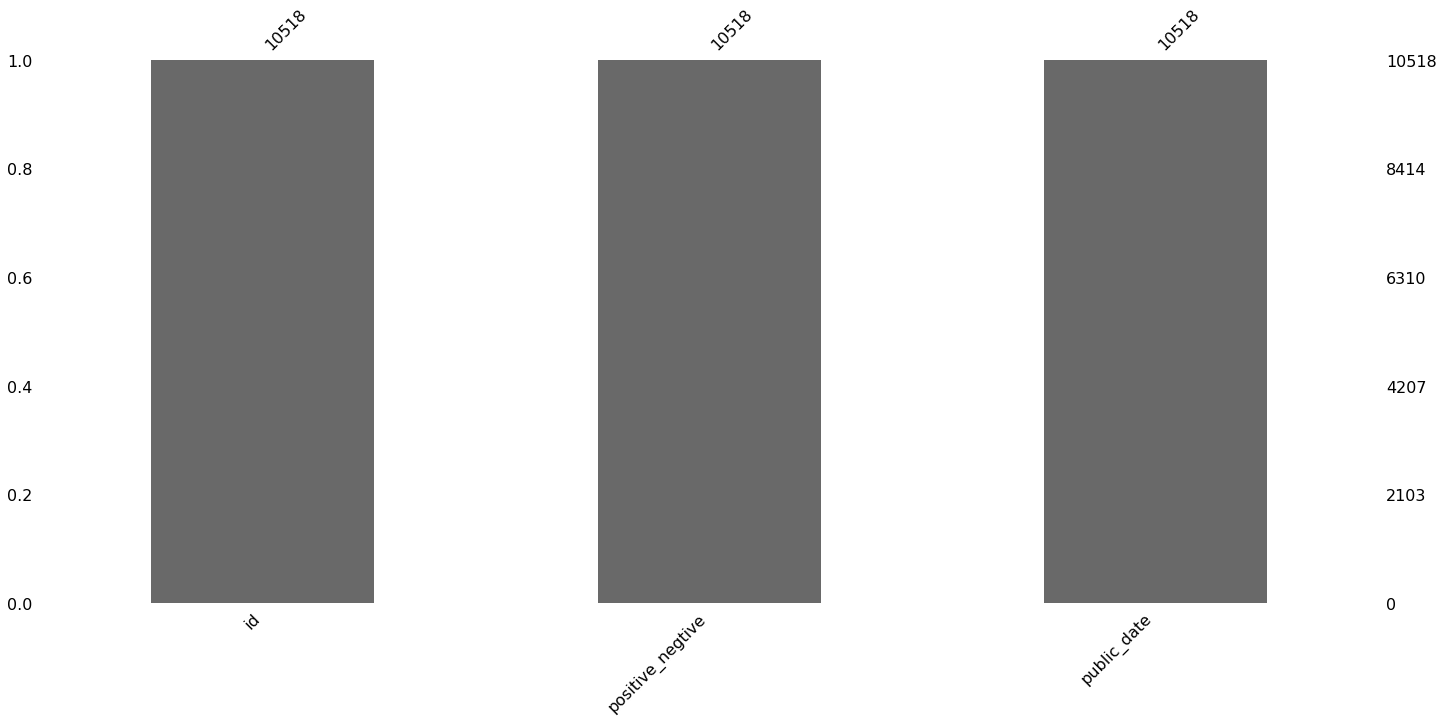

In [35]:
msno.bar(news_info)

In [36]:
other_info = pd.read_csv('other_info.csv')

In [37]:
print(other_info.shape)
print(other_info['id'].nunique())

(1890, 4)
1888


<AxesSubplot:>

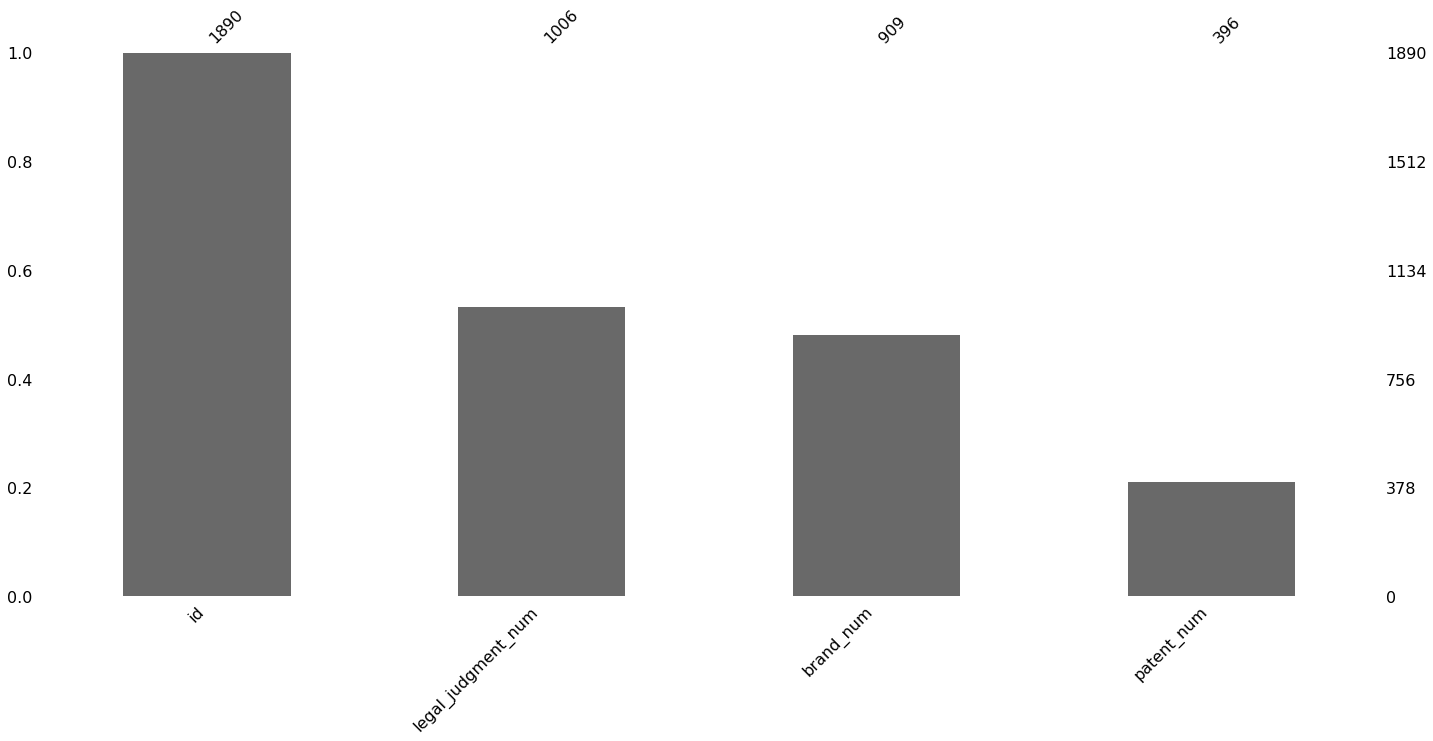

In [38]:
msno.bar(other_info)

In [39]:
entprise_info = pd.read_csv('entprise_info.csv')
entprise_info

,id,label
0,59b38c56de3836831ff90a77d892a13523b7494f6ed09ff7,1
1,da8691b210adb3f6be8064e006f220070565db287275ad38,0
2,82750f1b9d122350918121f97c99bf96e11aa24ee91504a9,0
3,f000950527a6feb6b2c6de6f85c1e7438ba5590be931e2ec,0
4,f1c1045b13d1832927e3743e49d2917f2d98424f0849a373,0
...,...,...
14860,216bd2aaf4d079242082b9d367435a08dc120b8de3e4bbb0,0
14861,e9f7b28ec10e0470ced7ec6501a54dd4a3f93e5e67eb12ba,0
14862,9c7fa510616a6830cb4645157d59aec8953184da2f5c6f45,0
14863,f000950527a6feb6648ce953b47101e15608d6422999cbe1,0


In [40]:
# 定义处理缺失值函数
def DROPNA(table, yz = 0.05):
    col = []
    for c in table.columns:
        if table[c].isna().mean() >= (1 - yz):
            col.append(c)
    return col

In [41]:
base_info = base_info.drop(DROPNA(base_info), axis = 1)
tax_info = tax_info.drop(DROPNA(tax_info), axis = 1)
other_info = other_info.drop(DROPNA(other_info), axis = 1)
entprise_info = entprise_info.drop(DROPNA(entprise_info), axis = 1)
change_info = change_info.drop(DROPNA(change_info), axis = 1)
annual_report_info = annual_report_info.drop(DROPNA(annual_report_info), axis = 1)

In [42]:
print(base_info.shape)
print(tax_info.shape)
print(other_info.shape)
print(entprise_info.shape)
print(change_info.shape)
print(annual_report_info.shape)

(24865, 27)
(29195, 9)
(1890, 4)
(14865, 2)
(45940, 5)
(22550, 19)


In [43]:
other_info.drop_duplicates('id', inplace = True)

In [44]:
other_info['sum'] = other_info[['legal_judgment_num', 'brand_num', 'patent_num']].sum(1)

In [45]:
other_info['NULL_sum'] = other_info[['legal_judgment_num', 'brand_num', 'patent_num']].isnull().astype(int).sum(1)

In [46]:
other_info

,id,legal_judgment_num,brand_num,patent_num,sum,NULL_sum
0,f000950527a6feb6d340f91da09e61347d8200cd2f0d1602,4.0,NaN,NaN,4.0,2
1,f000950527a6feb608dd9322b74a99f60851207f36a3c94c,1.0,NaN,NaN,1.0,2
2,d8071a739aa75a3b9f23966f8dae78fd226c272515b9c255,2.0,NaN,NaN,2.0,2
3,216bd2aaf4d079242209b1496f81a36c7abed9dd0bb65ed3,NaN,1.0,NaN,1.0,2
4,e9f7b28ec10e0470de9631c789f49acdd4e7cf9ed6db094b,NaN,2.0,NaN,2.0,2
...,...,...,...,...,...,...
1885,47645761dc56bb8cf147c0f51d60cfe28fd995aaca7693d9,6.0,NaN,NaN,6.0,2
1886,f000950527a6feb69ea351e48351a711fb09bf1b83f04dfc,1.0,NaN,NaN,1.0,2
1887,d8071a739aa75a3b39130af3718b2f261b57833a6a58ba55,2.0,1.0,NaN,3.0,1
1888,d8071a739aa75a3b6860158ec0cc8ba7972fb14ba37b9e0a,1.0,NaN,NaN,1.0,2


In [47]:
news_info

,id,positive_negtive,public_date
0,f000950527a6feb62669d6a175fe6fdccd1eb4f7ca8e5016,积极,2016-12-30
1,f000950527a6feb6e8bd9919e2ca363359bcfa997a0f9de7,中立,2017-08-09
2,f000950527a6feb6e8bd9919e2ca363359bcfa997a0f9de7,消极,2016-02-29
3,d8071a739aa75a3bcf6fb0041ee883243251d30025ab9d45,中立,2018-06-08
4,f000950527a6feb6d71de3382afa0bc5ff87bb65477f698a,积极,2015-06-29
...,...,...,...
10513,d8071a739aa75a3b6860158ec0cc8ba7972fb14ba37b9e0a,中立,2013-12-25
10514,d8071a739aa75a3b6860158ec0cc8ba7972fb14ba37b9e0a,积极,2013-12-23
10515,f000950527a6feb6de489447885cd6d18f593ec2674174ac,中立,2020-04-07
10516,f000950527a6feb6de489447885cd6d18f593ec2674174ac,中立,2020-02-21


In [48]:
news_info['public_date'] = news_info['public_date'].apply(lambda x:x if '-' in str(x) else np.nan)
news_info['public_date'] = pd.to_datetime(news_info['public_date'])
news_info['public_date'] = (datetime.now() - news_info['public_date']).dt.days

In [49]:
# 构造维度
news_info1 = news_info.groupby('id').agg({'public_date':['count', 'max', 'min', 'mean']}).reset_index()
# 透视表
news_info2 = pd.pivot_table(news_info, index = 'id', columns = 'positive_negtive',aggfunc='count').reset_index()

In [50]:
news_info1 = pd.merge(news_info1, news_info2)

In [51]:
tax_info = pd.read_csv('tax_info.csv')

In [52]:
tax_info = tax_info.groupby('id').agg({'TAX_CATEGORIES':['count'], 'TAX_ITEMS':['count'], 'TAXATION_BASIS':['count'], 'TAX_AMOUNT':['max', 'min', 'mean']})

In [53]:
tax_info.columns = pd.Index(['pre_' + i[0].lower() + "_" + i[1] for i in tax_info.columns.tolist()])

In [54]:
tax_info1 = tax_info.reset_index()

In [55]:
tax_info1

,id,pre_tax_categories_count,pre_tax_items_count,pre_taxation_basis_count,pre_tax_amount_max,pre_tax_amount_min,pre_tax_amount_mean
0,216bd2aaf4d079243f3c0bd3d6d28333c790bd3aee0ddad8,46,46,46,91.22,13.00,37.562826
1,216bd2aaf4d079248a1cb9c41425810a25d29c1fc1d1c15a,4,4,0,19908.96,86.90,6259.625000
2,216bd2aaf4d07924caa4f30fb76969cba69358e90e310f5e,1,1,0,2400.00,2400.00,2400.000000
3,216bd2aaf4d07924d90a8951ef6a87c01e2f2ec78aa14698,2,2,0,129.60,75.00,102.300000
4,47645761dc56bb8c0ee994e2cf201d523319b7160f6722f8,4,4,0,36.33,1.28,18.485000
...,...,...,...,...,...,...,...
803,f000950527a6feb6ffe907f8834823a2f59558e4c659f69f,7,7,7,444.14,444.14,444.140000
804,f1c1045b13d1832901cff13996a612ace9f87d89508645c3,4,4,0,1662.50,82.50,872.500000
805,f1c1045b13d183292976719cbaa4c35a642acc00976f76f9,3,3,0,617.50,46.50,427.166667
806,f1c1045b13d18329892d7c8c276306169e41550e3341d8bf,2,2,0,431.50,31.50,231.500000


In [56]:
change_info

,id,bgxmdm,bgq,bgh,bgrq
0,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,939.0,9dec12da51cdb672a91b4a8ae0e0895f7bfeb243dfa3e0c8,9dec12da51cdb672a91b4a8ae0e0895f4a56cbe3deca98...,2.019060e+13
1,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,112.0,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,2.019060e+13
2,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,111.0,54ca436ffb87f24c820178b45fcc3a7b,f80e3376abcf81ad2a279d6d99046153,2.017013e+13
3,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,128.0,f1fdb1c866dc96638cbfb8b788b91393,1eca8a0d8beca58d988f7dccab5dc868,2.017013e+13
4,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,925.0,54ca436ffb87f24c820178b45fcc3a7b,f80e3376abcf81ad2a279d6d99046153,2.017013e+13
...,...,...,...,...,...
45935,da8691b210adb3f65b43370d3a362f4aa1d3b16b5ba0c9d7,113.0,89fe2eb3a8d8cbd5d10c8fad19102adc96d250d70714c2...,89fe2eb3a8d8cbd5d10c8fad19102adc31cd22c6637a9c...,2.018012e+13
45936,9c7fa510616a68303d3427d4bfd4b0cf3e4843f2bf3f637a,128.0,86cd59dbe8243a52,d0b849303de5e628ee7a54538f0f776b,2.018063e+13
45937,9c7fa510616a68303d3427d4bfd4b0cf3e4843f2bf3f637a,113.0,6be29fd3c7f6c82d30f07bfcb4d88b653076b95e512332...,6be29fd3c7f6c82d30f07bfcb4d88b653076b95e512332...,2.018063e+13
45938,9c7fa510616a68303d3427d4bfd4b0cf3e4843f2bf3f637a,131.0,13d999d56eb3e102,9cfe81eb6c3bb14c1e7ef4e004dc27fe,2.018063e+13


In [57]:
change_info['bgrq'] = (change_info['bgrq']/10000000000).astype(int)

In [58]:
change_info = change_info.groupby('id').agg({
    'bgxmdm': ['count', 'nunique'],
    'bgq':['nunique'],
    'bgh': ['nunique'],
    'bgrq': ['nunique'],
})

In [59]:
change_info.columns = pd.Index(['changeinfo_' + i[0] + "_" + i[1] for i in change_info.columns.tolist()])

In [60]:
change_info = change_info.reset_index()

In [61]:
change_info

,id,changeinfo_bgxmdm_count,changeinfo_bgxmdm_nunique,changeinfo_bgq_nunique,changeinfo_bgh_nunique,changeinfo_bgrq_nunique
0,09912c34159b1720558a419983a989f1dd2e0ed69a044ca3,9,6,8,9,2
1,0ba26b418aa50d3c35e3d01d414b2c9f07efa6997fbf4394,5,5,5,5,1
2,175ebe5f059ec05007223e9af0a48b885f4cbfa833d93eed,11,10,10,10,3
3,175ebe5f059ec05036d901021be6da41057ae3ee1fe6b8bb,15,9,14,14,3
4,175ebe5f059ec0503eb86987a7b6da7c40c6e69d5b54736f,2,2,2,2,1
...,...,...,...,...,...,...
8721,f1c1045b13d18329fff6b6c261a696a54cc111b991a55a72,1,1,1,1,1
8722,f6eb47aa168d4141ebdc3e35a7b37a3cb15baa8608f730a0,2,2,2,2,1
8723,ff2c78b9022767a53da2e5a811e4aa9583e32efc9899f9f3,2,2,2,2,1
8724,ff2c78b9022767a5439dae566c7603a03a6178241dacf5c9,13,8,9,10,2


In [62]:
annual_report_info = annual_report_info.groupby('id').agg({'ANCHEYEAR': ['max'],'STATE': ['max'],'FUNDAM': ['max'],'EMPNUM': ['max'],'UNEEMPLNUM': ['max', 'sum']})
annual_report_info.columns = pd.Index(['PREV_' + i[0] + "_" + i[1].upper() for i in annual_report_info.columns.tolist()])
annual_report_info = annual_report_info.reset_index()

In [63]:
base_info.head(10)

,id,oplocdistrict,industryphy,industryco,dom,opscope,enttype,enttypeitem,opfrom,opto,state,orgid,jobid,adbusign,townsign,regtype,empnum,compform,parnum,exenum,opform,venind,enttypeminu,oploc,regcap,reccap,enttypegb
0,47645761dc56bb8c5fae00114b768b5d9b6e917c3aec07c4,340223,M,7513.0,31487d8f256f16bd6244b7251be2ebb24d1db51663c654...,纳米新材料、机械设备、五金配件加工、销售及技术推广服务，道路货物运输。（依法须经批准的项目，...,1100,1150.0,2019-07-11 00:00:00,NaN,6,340223010010000000,340200000000115392,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,1151.0,2367b4cac96d8598,50.0,NaN,1151
1,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,340222,O,8090.0,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,健身服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2017-09-06,NaN,6,340222060010000000,340200000000112114,0,1,1,3.0,1.0,NaN,NaN,10,3.0,NaN,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,10.0,NaN,9600
2,59b38c56de3836838082cfcb1a298951abfe15e6940c49ba,340202,R,9053.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,文化娱乐经纪人服务；境内文艺活动组织与策划；文化艺术交流活动组织策划；演出经纪；其他文化艺术...,1100,1150.0,2020-09-14 14:46:30,NaN,6,340202010010000000,400000000000753910,0,0,1,2.0,NaN,1.0,NaN,NaN,NaN,1151.0,2367b4cac96d8598,100.0,NaN,1151
3,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,340221,L,7212.0,746df9aaed8578571760c563abe882c8ba25209fc6d5db...,投资管理及咨询(证券、期货除外)；企业管理。（依法须经批准的项目，经相关部门批准后方可开展经...,4500,4540.0,2015-09-30,NaN,6,340221010010000000,400000000000013538,0,1,1,2.0,NaN,NaN,NaN,01-以个人财产出资,NaN,NaN,2367b4cac96d8598,10.0,NaN,4540
4,f000950527a6feb63ee1ce82bb22ddd1ab8b8fdffa3b91fb,340202,R,8810.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,境内文化艺术交流活动策划；企业形象策划；礼仪庆典服务；翻译服务；专利代理；广告设计、制作、代...,1100,1130.0,2017-12-01,2067-11-30,7,340200000000000000,400000000000283237,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2367b4cac96d8598,100.0,NaN,1130
5,da8691b210adb3f67820f5e0c87b337d63112cee52211888,340207,R,9019.0,ca213febe80e171c3b9617e39b49d64e79eaa1699bd4df...,棋牌娱乐服务；理发服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2019-09-29,NaN,6,340207040010000000,400000000000325767,0,0,1,1.0,1.0,NaN,NaN,10,3.0,NaN,31487d8f256f16bd6244b7251be2ebb2918919c75535b4...,10.0,NaN,9600
6,9c7fa510616a6830b878f3c8c4317d93e1b022e7f22ae231,340222,O,8052.0,ca213febe80e171cd550f179e9cf5434d53fa8601fba34...,足疗服务（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2020-08-03 00:00:00,NaN,6,340222080010000000,340200000000101006,0,1,1,5.0,1.0,NaN,NaN,10,3.0,NaN,7c29d90151b88c9f396c6c8374278fe7cab4859047594f...,20.0,NaN,9600
7,9c7fa510616a68309e4badf2a7a3123c0462fb85bf28ef17,340222,O,8111.0,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,汽车维修服务，汽车零配件批发兼零售。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2017-07-10,NaN,6,340222060010000000,340200000000112114,0,1,1,7.0,1.0,NaN,NaN,10,3.0,NaN,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,15.0,NaN,9600
8,216bd2aaf4d07924b4a106be25791281e2a6d9e54eaee13b,340203,M,7519.0,31487d8f256f16bd6244b7251be2ebb2104d8ea0072d61...,机电设备批发；机电设备零售；机电设备安装及维修；太阳能热水器设备及配件、太阳能光伏设备及配件...,1100,1190.0,2020-03-10 11:52:15,NaN,6,340203010010000000,400000000000753907,0,0,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2367b4cac96d8598,300.0,NaN,1190
9,743e550a617316d5772a00182284976e17d42b6f0ca6d374,340208,O,8051.0,31487d8f256f16bd6244b7251be2ebb2918919c75535b4...,足浴服务（依法须经批准的项目，经相关部门批准后方可开展经营活动）。***,9600,NaN,2016-02-29,NaN,6,340206040010000000,340200000020001736,0,1,1,6.0,1.0,NaN,NaN,10,3.0,NaN,ca213febe80e171c6293b0274cbe9e27b4b53b5313603c...,10.0,NaN,9600


In [64]:
base_info['feature1'] = (base_info['orgid'].fillna('').apply(lambda x: str(x)[:6]) == base_info['oplocdistrict'].fillna('').apply(lambda x: str(x)[:6])).astype(int)

In [65]:
base_info

,id,oplocdistrict,industryphy,industryco,dom,opscope,enttype,enttypeitem,opfrom,opto,state,orgid,jobid,adbusign,townsign,regtype,empnum,compform,parnum,exenum,opform,venind,enttypeminu,oploc,regcap,reccap,enttypegb,feature1
0,47645761dc56bb8c5fae00114b768b5d9b6e917c3aec07c4,340223,M,7513.0,31487d8f256f16bd6244b7251be2ebb24d1db51663c654...,纳米新材料、机械设备、五金配件加工、销售及技术推广服务，道路货物运输。（依法须经批准的项目，...,1100,1150.0,2019-07-11 00:00:00,NaN,6,340223010010000000,340200000000115392,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,1151.0,2367b4cac96d8598,50.0,NaN,1151,1
1,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,340222,O,8090.0,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,健身服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2017-09-06,NaN,6,340222060010000000,340200000000112114,0,1,1,3.0,1.0,NaN,NaN,10,3.0,NaN,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,10.0,NaN,9600,1
2,59b38c56de3836838082cfcb1a298951abfe15e6940c49ba,340202,R,9053.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,文化娱乐经纪人服务；境内文艺活动组织与策划；文化艺术交流活动组织策划；演出经纪；其他文化艺术...,1100,1150.0,2020-09-14 14:46:30,NaN,6,340202010010000000,400000000000753910,0,0,1,2.0,NaN,1.0,NaN,NaN,NaN,1151.0,2367b4cac96d8598,100.0,NaN,1151,1
3,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,340221,L,7212.0,746df9aaed8578571760c563abe882c8ba25209fc6d5db...,投资管理及咨询(证券、期货除外)；企业管理。（依法须经批准的项目，经相关部门批准后方可开展经...,4500,4540.0,2015-09-30,NaN,6,340221010010000000,400000000000013538,0,1,1,2.0,NaN,NaN,NaN,01-以个人财产出资,NaN,NaN,2367b4cac96d8598,10.0,NaN,4540,1
4,f000950527a6feb63ee1ce82bb22ddd1ab8b8fdffa3b91fb,340202,R,8810.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,境内文化艺术交流活动策划；企业形象策划；礼仪庆典服务；翻译服务；专利代理；广告设计、制作、代...,1100,1130.0,2017-12-01,2067-11-30,7,340200000000000000,400000000000283237,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2367b4cac96d8598,100.0,NaN,1130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,f1c1045b13d18329a2bd99d2a7e2227688c0d69bf1d1e325,340225,O,8131.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,家电销售、维修及安装服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2009-02-20 00:00:00,NaN,6,340200000000116780,341400000000011622,0,1,1,3.0,1.0,NaN,NaN,10,3.0,NaN,f67c1b92f52ac52e424308ab51241cdef9be3e39c8e1c6...,20.0,NaN,9600,0
24861,f000950527a6feb6bde38216d7cbbf32e66d3a3a96d4dbda,340207,J,6790.0,31487d8f256f16bdb06579d53b25cbb6c4a6c18662c495...,股权投资，投资管理，投资咨询。（依法须经批准的项目，经相关部门批准后方可开展经营活动）***,4500,4530.0,2015-12-18,2065-12-17,6,340200000000000000,340200000000115797,0,1,1,2.0,NaN,2.0,1.0,NaN,NaN,4533.0,2367b4cac96d8598,110.0,0.0,4533,0
24862,da8691b210adb3f65b43370d3a362f4aa1d3b16b5ba0c9d7,340207,O,8111.0,ca213febe80e171c3b9617e39b49d64e4a4abca4f2d760...,快速喷漆、电路机维修、汽车美容装潢、汽车维修服务。（依法须经批准的项目，经相关部门批准后方可...,9600,NaN,2012-05-31 00:00:00,NaN,6,340207030010000000,340200000000115275,0,1,1,2.0,1.0,NaN,NaN,10,3.0,NaN,2367b4cac96d8598,10.0,NaN,9600,1
24863,516ab81418ed215dcbbf0614a7b929e691f8eed153d7bb31,340225,O,8090.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,一般经营项目：园林设计、市政绿化、假山工艺、苗圃栽培。,1100,1130.0,2012-10-16 00:00:00,NaN,7,340200000000116750,341400000000015220,0,1,1,3.0,1.0,NaN,NaN,NaN,3.0,NaN,2367b4cac96d8598,260.0,260.0,1130,0


In [66]:
base_info['feature2'] = (base_info['orgid'].fillna('').apply(lambda x:str(x)[:6]) == base_info['jobid'].fillna('').apply(lambda x: str(x)[:6])).astype(int)

In [67]:
base_info['feature3'] = (base_info['oplocdistrict'].fillna('').apply(lambda x: str(x)[:6]) == base_info['jobid'].fillna('').apply(lambda x:str(x)[:6])).astype(int)

In [68]:
base_info

,id,oplocdistrict,industryphy,industryco,dom,opscope,enttype,enttypeitem,opfrom,opto,state,orgid,jobid,adbusign,townsign,regtype,empnum,compform,parnum,exenum,opform,venind,enttypeminu,oploc,regcap,reccap,enttypegb,feature1,feature2,feature3
0,47645761dc56bb8c5fae00114b768b5d9b6e917c3aec07c4,340223,M,7513.0,31487d8f256f16bd6244b7251be2ebb24d1db51663c654...,纳米新材料、机械设备、五金配件加工、销售及技术推广服务，道路货物运输。（依法须经批准的项目，...,1100,1150.0,2019-07-11 00:00:00,NaN,6,340223010010000000,340200000000115392,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,1151.0,2367b4cac96d8598,50.0,NaN,1151,1,0,0
1,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,340222,O,8090.0,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,健身服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2017-09-06,NaN,6,340222060010000000,340200000000112114,0,1,1,3.0,1.0,NaN,NaN,10,3.0,NaN,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,10.0,NaN,9600,1,0,0
2,59b38c56de3836838082cfcb1a298951abfe15e6940c49ba,340202,R,9053.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,文化娱乐经纪人服务；境内文艺活动组织与策划；文化艺术交流活动组织策划；演出经纪；其他文化艺术...,1100,1150.0,2020-09-14 14:46:30,NaN,6,340202010010000000,400000000000753910,0,0,1,2.0,NaN,1.0,NaN,NaN,NaN,1151.0,2367b4cac96d8598,100.0,NaN,1151,1,0,0
3,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,340221,L,7212.0,746df9aaed8578571760c563abe882c8ba25209fc6d5db...,投资管理及咨询(证券、期货除外)；企业管理。（依法须经批准的项目，经相关部门批准后方可开展经...,4500,4540.0,2015-09-30,NaN,6,340221010010000000,400000000000013538,0,1,1,2.0,NaN,NaN,NaN,01-以个人财产出资,NaN,NaN,2367b4cac96d8598,10.0,NaN,4540,1,0,0
4,f000950527a6feb63ee1ce82bb22ddd1ab8b8fdffa3b91fb,340202,R,8810.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,境内文化艺术交流活动策划；企业形象策划；礼仪庆典服务；翻译服务；专利代理；广告设计、制作、代...,1100,1130.0,2017-12-01,2067-11-30,7,340200000000000000,400000000000283237,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2367b4cac96d8598,100.0,NaN,1130,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,f1c1045b13d18329a2bd99d2a7e2227688c0d69bf1d1e325,340225,O,8131.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,家电销售、维修及安装服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2009-02-20 00:00:00,NaN,6,340200000000116780,341400000000011622,0,1,1,3.0,1.0,NaN,NaN,10,3.0,NaN,f67c1b92f52ac52e424308ab51241cdef9be3e39c8e1c6...,20.0,NaN,9600,0,0,0
24861,f000950527a6feb6bde38216d7cbbf32e66d3a3a96d4dbda,340207,J,6790.0,31487d8f256f16bdb06579d53b25cbb6c4a6c18662c495...,股权投资，投资管理，投资咨询。（依法须经批准的项目，经相关部门批准后方可开展经营活动）***,4500,4530.0,2015-12-18,2065-12-17,6,340200000000000000,340200000000115797,0,1,1,2.0,NaN,2.0,1.0,NaN,NaN,4533.0,2367b4cac96d8598,110.0,0.0,4533,0,1,0
24862,da8691b210adb3f65b43370d3a362f4aa1d3b16b5ba0c9d7,340207,O,8111.0,ca213febe80e171c3b9617e39b49d64e4a4abca4f2d760...,快速喷漆、电路机维修、汽车美容装潢、汽车维修服务。（依法须经批准的项目，经相关部门批准后方可...,9600,NaN,2012-05-31 00:00:00,NaN,6,340207030010000000,340200000000115275,0,1,1,2.0,1.0,NaN,NaN,10,3.0,NaN,2367b4cac96d8598,10.0,NaN,9600,1,0,0
24863,516ab81418ed215dcbbf0614a7b929e691f8eed153d7bb31,340225,O,8090.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,一般经营项目：园林设计、市政绿化、假山工艺、苗圃栽培。,1100,1130.0,2012-10-16 00:00:00,NaN,7,340200000000116750,341400000000015220,0,1,1,3.0,1.0,NaN,NaN,NaN,3.0,NaN,2367b4cac96d8598,260.0,260.0,1130,0,0,0


In [69]:
base_info.columns

Index(['id', 'oplocdistrict', 'industryphy', 'industryco', 'dom', 'opscope',
       'enttype', 'enttypeitem', 'opfrom', 'opto', 'state', 'orgid', 'jobid',
       'adbusign', 'townsign', 'regtype', 'empnum', 'compform', 'parnum',
       'exenum', 'opform', 'venind', 'enttypeminu', 'oploc', 'regcap',
       'reccap', 'enttypegb', 'feature1', 'feature2', 'feature3'],
      dtype='object')

In [70]:
base_info['yuangong_sum'] = base_info[['empnum','parnum','exenum']].sum(1).astype(int)

In [71]:
base_info['kongyuangong_sum'] = base_info[['empnum','parnum','exenum']].isnull().astype(int).sum(1)

In [72]:
base_info

,id,oplocdistrict,industryphy,industryco,dom,opscope,enttype,enttypeitem,opfrom,opto,state,orgid,jobid,adbusign,townsign,regtype,empnum,compform,parnum,exenum,opform,venind,enttypeminu,oploc,regcap,reccap,enttypegb,feature1,feature2,feature3,yuangong_sum,kongyuangong_sum
0,47645761dc56bb8c5fae00114b768b5d9b6e917c3aec07c4,340223,M,7513.0,31487d8f256f16bd6244b7251be2ebb24d1db51663c654...,纳米新材料、机械设备、五金配件加工、销售及技术推广服务，道路货物运输。（依法须经批准的项目，...,1100,1150.0,2019-07-11 00:00:00,NaN,6,340223010010000000,340200000000115392,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,1151.0,2367b4cac96d8598,50.0,NaN,1151,1,0,0,5,2
1,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,340222,O,8090.0,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,健身服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2017-09-06,NaN,6,340222060010000000,340200000000112114,0,1,1,3.0,1.0,NaN,NaN,10,3.0,NaN,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,10.0,NaN,9600,1,0,0,3,2
2,59b38c56de3836838082cfcb1a298951abfe15e6940c49ba,340202,R,9053.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,文化娱乐经纪人服务；境内文艺活动组织与策划；文化艺术交流活动组织策划；演出经纪；其他文化艺术...,1100,1150.0,2020-09-14 14:46:30,NaN,6,340202010010000000,400000000000753910,0,0,1,2.0,NaN,1.0,NaN,NaN,NaN,1151.0,2367b4cac96d8598,100.0,NaN,1151,1,0,0,3,1
3,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,340221,L,7212.0,746df9aaed8578571760c563abe882c8ba25209fc6d5db...,投资管理及咨询(证券、期货除外)；企业管理。（依法须经批准的项目，经相关部门批准后方可开展经...,4500,4540.0,2015-09-30,NaN,6,340221010010000000,400000000000013538,0,1,1,2.0,NaN,NaN,NaN,01-以个人财产出资,NaN,NaN,2367b4cac96d8598,10.0,NaN,4540,1,0,0,2,2
4,f000950527a6feb63ee1ce82bb22ddd1ab8b8fdffa3b91fb,340202,R,8810.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,境内文化艺术交流活动策划；企业形象策划；礼仪庆典服务；翻译服务；专利代理；广告设计、制作、代...,1100,1130.0,2017-12-01,2067-11-30,7,340200000000000000,400000000000283237,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2367b4cac96d8598,100.0,NaN,1130,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,f1c1045b13d18329a2bd99d2a7e2227688c0d69bf1d1e325,340225,O,8131.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,家电销售、维修及安装服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2009-02-20 00:00:00,NaN,6,340200000000116780,341400000000011622,0,1,1,3.0,1.0,NaN,NaN,10,3.0,NaN,f67c1b92f52ac52e424308ab51241cdef9be3e39c8e1c6...,20.0,NaN,9600,0,0,0,3,2
24861,f000950527a6feb6bde38216d7cbbf32e66d3a3a96d4dbda,340207,J,6790.0,31487d8f256f16bdb06579d53b25cbb6c4a6c18662c495...,股权投资，投资管理，投资咨询。（依法须经批准的项目，经相关部门批准后方可开展经营活动）***,4500,4530.0,2015-12-18,2065-12-17,6,340200000000000000,340200000000115797,0,1,1,2.0,NaN,2.0,1.0,NaN,NaN,4533.0,2367b4cac96d8598,110.0,0.0,4533,0,1,0,5,0
24862,da8691b210adb3f65b43370d3a362f4aa1d3b16b5ba0c9d7,340207,O,8111.0,ca213febe80e171c3b9617e39b49d64e4a4abca4f2d760...,快速喷漆、电路机维修、汽车美容装潢、汽车维修服务。（依法须经批准的项目，经相关部门批准后方可...,9600,NaN,2012-05-31 00:00:00,NaN,6,340207030010000000,340200000000115275,0,1,1,2.0,1.0,NaN,NaN,10,3.0,NaN,2367b4cac96d8598,10.0,NaN,9600,1,0,0,2,2
24863,516ab81418ed215dcbbf0614a7b929e691f8eed153d7bb31,340225,O,8090.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,一般经营项目：园林设计、市政绿化、假山工艺、苗圃栽培。,1100,1130.0,2012-10-16 00:00:00,NaN,7,340200000000116750,341400000000015220,0,1,1,3.0,1.0,NaN,NaN,NaN,3.0,NaN,2367b4cac96d8598,260.0,260.0,1130,0,0,0,3,2


In [73]:
base_info['opfrom'] = pd.to_datetime(base_info['opfrom'])
base_info['opto'] = pd.to_datetime(base_info['opto'])
base_info['opfromtonow'] = (datetime.now()-base_info['opfrom']).dt.days
base_info['opfromtime'] = (base_info['opto']-base_info['opfrom']).dt.days

In [74]:
base_info

,id,oplocdistrict,industryphy,industryco,dom,opscope,enttype,enttypeitem,opfrom,opto,state,orgid,jobid,adbusign,townsign,regtype,empnum,compform,parnum,exenum,opform,venind,enttypeminu,oploc,regcap,reccap,enttypegb,feature1,feature2,feature3,yuangong_sum,kongyuangong_sum,opfromtonow,opfromtime
0,47645761dc56bb8c5fae00114b768b5d9b6e917c3aec07c4,340223,M,7513.0,31487d8f256f16bd6244b7251be2ebb24d1db51663c654...,纳米新材料、机械设备、五金配件加工、销售及技术推广服务，道路货物运输。（依法须经批准的项目，...,1100,1150.0,2019-07-11 00:00:00,NaT,6,340223010010000000,340200000000115392,0,0,1,5.0,NaN,NaN,NaN,NaN,NaN,1151.0,2367b4cac96d8598,50.0,NaN,1151,1,0,0,5,2,609,NaN
1,9c7fa510616a683058ce97d0bc768a621cd85ab1e87da2a3,340222,O,8090.0,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,健身服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2017-09-06 00:00:00,NaT,6,340222060010000000,340200000000112114,0,1,1,3.0,1.0,NaN,NaN,10,3.0,NaN,31487d8f256f16bd6244b7251be2ebb27b17bdfd95c8f3...,10.0,NaN,9600,1,0,0,3,2,1282,NaN
2,59b38c56de3836838082cfcb1a298951abfe15e6940c49ba,340202,R,9053.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,文化娱乐经纪人服务；境内文艺活动组织与策划；文化艺术交流活动组织策划；演出经纪；其他文化艺术...,1100,1150.0,2020-09-14 14:46:30,NaT,6,340202010010000000,400000000000753910,0,0,1,2.0,NaN,1.0,NaN,NaN,NaN,1151.0,2367b4cac96d8598,100.0,NaN,1151,1,0,0,3,1,178,NaN
3,e9f7b28ec10e047000d16ab79e1b5e6da434a1697cce7818,340221,L,7212.0,746df9aaed8578571760c563abe882c8ba25209fc6d5db...,投资管理及咨询(证券、期货除外)；企业管理。（依法须经批准的项目，经相关部门批准后方可开展经...,4500,4540.0,2015-09-30 00:00:00,NaT,6,340221010010000000,400000000000013538,0,1,1,2.0,NaN,NaN,NaN,01-以个人财产出资,NaN,NaN,2367b4cac96d8598,10.0,NaN,4540,1,0,0,2,2,1989,NaN
4,f000950527a6feb63ee1ce82bb22ddd1ab8b8fdffa3b91fb,340202,R,8810.0,31487d8f256f16bd6244b7251be2ebb2ae36cd652943e8...,境内文化艺术交流活动策划；企业形象策划；礼仪庆典服务；翻译服务；专利代理；广告设计、制作、代...,1100,1130.0,2017-12-01 00:00:00,2067-11-30,7,340200000000000000,400000000000283237,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2367b4cac96d8598,100.0,NaN,1130,0,0,0,0,3,1196,18261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24860,f1c1045b13d18329a2bd99d2a7e2227688c0d69bf1d1e325,340225,O,8131.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,家电销售、维修及安装服务。（依法须经批准的项目，经相关部门批准后方可开展经营活动）,9600,NaN,2009-02-20 00:00:00,NaT,6,340200000000116780,341400000000011622,0,1,1,3.0,1.0,NaN,NaN,10,3.0,NaN,f67c1b92f52ac52e424308ab51241cdef9be3e39c8e1c6...,20.0,NaN,9600,0,0,0,3,2,4402,NaN
24861,f000950527a6feb6bde38216d7cbbf32e66d3a3a96d4dbda,340207,J,6790.0,31487d8f256f16bdb06579d53b25cbb6c4a6c18662c495...,股权投资，投资管理，投资咨询。（依法须经批准的项目，经相关部门批准后方可开展经营活动）***,4500,4530.0,2015-12-18 00:00:00,2065-12-17,6,340200000000000000,340200000000115797,0,1,1,2.0,NaN,2.0,1.0,NaN,NaN,4533.0,2367b4cac96d8598,110.0,0.0,4533,0,1,0,5,0,1910,18262.0
24862,da8691b210adb3f65b43370d3a362f4aa1d3b16b5ba0c9d7,340207,O,8111.0,ca213febe80e171c3b9617e39b49d64e4a4abca4f2d760...,快速喷漆、电路机维修、汽车美容装潢、汽车维修服务。（依法须经批准的项目，经相关部门批准后方可...,9600,NaN,2012-05-31 00:00:00,NaT,6,340207030010000000,340200000000115275,0,1,1,2.0,1.0,NaN,NaN,10,3.0,NaN,2367b4cac96d8598,10.0,NaN,9600,1,0,0,2,2,3206,NaN
24863,516ab81418ed215dcbbf0614a7b929e691f8eed153d7bb31,340225,O,8090.0,31487d8f256f16bd6244b7251be2ebb227ca54d864983f...,一般经营项目：园林设计、市政绿化、假山工艺、苗圃栽培。,1100,1130.0,2012-10-16 00:00:00,NaT,7,340200000000116750,341400000000015220,0,1,1,3.0,1.0,NaN,NaN,NaN,3.0,NaN,2367b4cac96d8598,260.0,260.0,1130,0,0,0,3,2,3068,NaN


In [75]:
base_info['opscope_count'] = base_info['opscope'].apply(lambda x:len(x.replace("\t", "，").replace("\n","，").split("、")))

In [76]:
base_info['opscope_count']

0        4
1        1
2        5
3        2
4        4
        ..
24860    2
24861    1
24862    4
24863    4
24864    2
Name: opscope_count, Length: 24865, dtype: int64

In [77]:
base_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24865 entries, 0 to 24864
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                24865 non-null  object        
 1   oplocdistrict     24865 non-null  int64         
 2   industryphy       24865 non-null  object        
 3   industryco        24864 non-null  float64       
 4   dom               24865 non-null  object        
 5   opscope           24865 non-null  object        
 6   enttype           24865 non-null  int64         
 7   enttypeitem       16651 non-null  float64       
 8   opfrom            24865 non-null  datetime64[ns]
 9   opto              8825 non-null   datetime64[ns]
 10  state             24865 non-null  int64         
 11  orgid             24865 non-null  int64         
 12  jobid             24865 non-null  int64         
 13  adbusign          24865 non-null  int64         
 14  townsign          2486

In [78]:
base_info['enttypegb']

0        1151
1        9600
2        1151
3        4540
4        1130
         ... 
24860    9600
24861    4533
24862    9600
24863    1130
24864    9600
Name: enttypegb, Length: 24865, dtype: int64

In [79]:
cate_col = ['oplocdistrict', 'industryphy', 'industryco', 'enttype', 'enttypeitem', 'enttypeminu', 'enttypegb', 'dom', 'oploc', 'opform']

In [ ]:
for c in cate_col:
    base_info[c+'_count'] = base_info[c].map(base_info[c].value_counts())
    col_idx = base_info[c].value_counts()
    for idx in col_idx[col_idx < 10].index:
        base_info[c] = base_info[c].replace(idx, -1)

In [ ]:
base_info

In [ ]:
base_info = base_info.drop(['opfrom','opto'],axis = 1)

In [ ]:
# 类别编码
for col in ['industryphy', 'dom', 'opform', 'oploc']:
    base_info[col] = pd.factorize(base_info[col])[0]

In [ ]:
base_info[['industryphy', 'dom', 'opform', 'oploc']]

In [ ]:
news_info

In [ ]:
train = pd.merge(base_info, entprise_info, on = 'id')
train = pd.merge(train, other_info, on = 'id',how = 'left')
train = pd.merge(train, news_info, on = 'id', how = 'left')
train = pd.merge(train, tax_info, on = 'id', how = 'left')
train = pd.merge(train, annual_report_info, on = 'id', how = 'left')
train = pd.merge(train, change_info, on = 'id', how = 'left')

In [ ]:
train.columns 

In [ ]:
test_idset = pd.read_csv('entprise_evaluate.csv')[['id']]


In [ ]:
test = pd.merge(base_info, test_idset, on = 'id')
test = pd.merge(test, other_info, on = 'id',how = 'left')
test = pd.merge(test, news_info, on = 'id', how = 'left')
test = pd.merge(test, tax_info, on = 'id', how = 'left')
test = pd.merge(test, annual_report_info, on = 'id', how = 'left')
test = pd.merge(test, change_info, on = 'id', how = 'left')

In [ ]:
train = train.drop(['positive_negtive'], axis = 1)

In [ ]:
test = test.drop(['positive_negtive'], axis = 1)

In [ ]:
train.to_csv('train.csv')

In [ ]:
test.to_csv('test.csv')

In [ ]:
X = train.drop(['label', 'id','opscope'], axis = 1)

In [ ]:
test.shape

In [ ]:
y = train['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
sk = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

In [ ]:
for train, test in sk.split(X, y):
    x_train = X.iloc[train]
    y_train = y.iloc[train]
    x_test = X.iloc[test]
    y_test = y.iloc[test]
    clf = lgb.LGBMClassifier(
        num_leaves=np.random.randint(6, 10), min_child_samples= np.random.randint(2,5),
        max_depth=5,learning_rate=0.03,
        n_estimators=150,n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pre = clf.predict(x_test)
    print(clf)
    print(f1_score(y_test, y_pre))
    print('-'*50)

In [ ]:
print(clf)

In [ ]:
clf = lgb.LGBMClassifier(
        num_leaves=np.random.randint(6, 10), min_child_samples= np.random.randint(2,5),
        max_depth=5,learning_rate=0.03,
        n_estimators=150,n_jobs=-1)

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
y_pre = clf.predict(x_test)

In [ ]:
f1_score(y_test, y_pre)